**You can use Google but don't use ChatGPT and Gemini. You are here to learn. Follow the instructions given below and write the code in that cell only.**


**Dataset Link:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [68]:
# Load the dataset using pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WineQT.csv')


5 is the quality with the highest percentage.


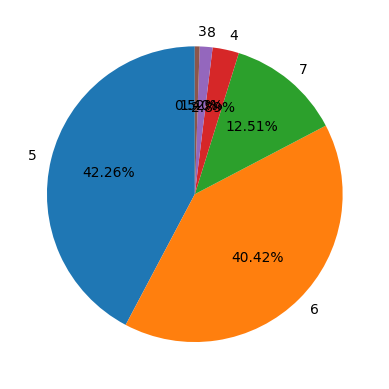

In [69]:
# Plot the pie chart showing how much each quality exist in this dataset
# Your pie chart should have 6 parts with each part representing 1 quality number
# Print out the quality which has the highest percent


# saving the counts of unique entries in 'quality' column
quality_val = df['quality'].value_counts()
plt.pie(quality_val, labels=quality_val.index, startangle=90, autopct="%.2f%%")

# saving the index of highest count in quality_val.
highest = quality_val.idxmax()          
print(highest, "is the quality with the highest percentage.")



Text(0, 0.5, 'Mean of alcohol')

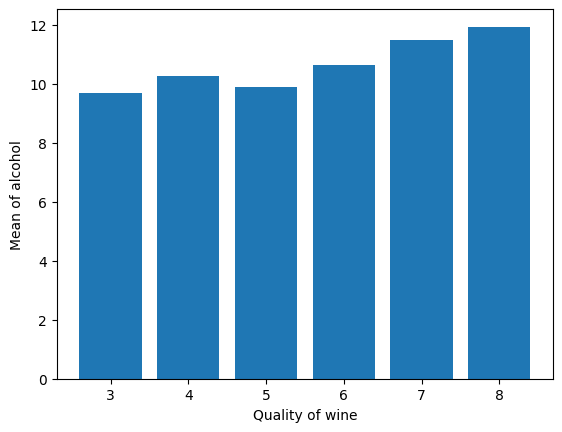

In [70]:
# Plot a bar graph
# X axis: Quality of wine
# Y axis: Mean of total alcohol in that quality of wine
# Suppose quality 5 has 9.4, 9.8, 9.2 as entries in alcohol column then the value will be (9.4 + 9.8 + 9.2)/3
# Hint: use groupby() and mean() methods


mean_val = df.groupby('quality')['alcohol'].mean()

plt.bar(mean_val.index, mean_val)
plt.xlabel("Quality of wine")
plt.ylabel("Mean of alcohol")




In [71]:
# Partition df into X and Y
# Y has only one column which is quality (target)
# X has all the other columns (features)

Y = df['quality']
print(Y)

print("\n")

X = df.drop("quality", axis=1)
print(X)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.55

In [90]:
# Split into train and test datasets using test_size = 0.2 and random_state = 97


from sklearn.model_selection import train_test_split

# X and Y are defined in above cells.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 97)
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(Y_test))
print(np.mean(Y_test))



74.99444574975686
72.37556012008733
5.6593886462882095
5.6593886462882095
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
712             8.0             0.580         0.16             2.0      0.120   
887             7.5             0.590         0.22             1.8      0.082   
939             6.7             0.460         0.24             1.7      0.077   
697             7.1             0.340         0.28             2.0      0.082   
37              8.6             0.380         0.36             3.0      0.081   
...             ...               ...          ...             ...        ...   
439             8.2             0.560         0.23             3.4      0.078   
910             7.9             0.765         0.00             2.0      0.084   
357            10.5             0.240         0.42             1.8      0.077   
772             9.2             0.310         0.36             2.2      0.079   
1011            7.7             0.6

In [92]:
# Define a function which implements the Min-Max Scaler
# Your function should take a column of X_train as input and returns a list/np array/pd series which is scaled version of that column

def scaler(lst):
    max_val = lst.max()
    min_val = lst.min()

    scaled_lst = (lst - min_val) / (max_val - min_val)
    return scaled_lst


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 97)

# without Min-Max Scaler
print(X_train['pH'])

print("\n")

# after Min-Max Scaler
print("Min Max Scaled list")
scaled_lst = scaler(X_train['pH'])
print(scaled_lst)



525    3.26
637    3.58
820    3.33
102    3.33
197    3.23
       ... 
179    3.26
949    3.36
105    3.35
419    3.72
90     3.24
Name: pH, Length: 914, dtype: float64


Min Max Scaled list
525    0.347826
637    0.626087
820    0.408696
102    0.408696
197    0.321739
         ...   
179    0.347826
949    0.434783
105    0.426087
419    0.747826
90     0.330435
Name: pH, Length: 914, dtype: float64


In [97]:
# Print out the min, max, mean value of the scaled column = 'volatile acidity'
# Print out the min, max, mean value of the scaled column = 'free sulfur dioxide'
# Which has higher min, max and mean value?


scaled_va = scaler(X_train['volatile acidity'])
scaled_fsd = scaler(X_train['free sulfur dioxide'])

# printing for 'volatile acidity'
print(scaled_va.min())
print(scaled_va.max())
print(scaled_va.mean())

print('\n')

# printing for 'free sulfur dioxide'
print(scaled_fsd.min())
print(scaled_fsd.max())
print(scaled_fsd.mean())

print('\n')

if(scaled_va.min() > scaled_fsd.min()):
    print("'volatile acidity' has higher value of min.")
else:
    print("'free sulfur dioxide' has higher value of min.")

if(scaled_va.max() > scaled_fsd.max()):
    print("'volatile acidity' has higher value of max.")
else:
    print("'free sulfur dioxide' has higher value of max.")

if(scaled_va.mean() > scaled_fsd.mean()):
    print("'volatile acidity' has higher value of mean.")
else:
   print("'free sulfur dioxide' has higher value of mean.") 






0.0
1.0
0.2819722130631576


0.0
1.0
0.21704660504915252


'free sulfur dioxide' has higher value of min.
'free sulfur dioxide' has higher value of max.
'volatile acidity' has higher value of mean.


In [109]:
# Perform normalization using sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
print(X_train_scaled)

print('\n')

print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))





[[-0.35670245  2.3811453  -0.86665773 ... -0.94954333 -0.8527382
  -0.1638706 ]
 [-0.52950777  0.56775816 -0.86665773 ...  0.17396757  0.35249984
   0.19347526]
 [ 0.10411174 -1.93251806  1.22985842 ...  0.58789264  1.27960602
   0.74573703]
 ...
 [-0.471906    0.37542922 -1.22459951 ... -0.71301472 -0.29647449
  -1.42649262]
 [-1.91195034 -0.61369104 -0.15077416 ...  0.46962833  3.31923962
  -0.484399  ]
 [-0.18389713  1.17222054  1.48553112 ... -0.00342889 -0.94544882
  -1.47630446]]


[ 1.78801783e-16  7.96834031e-17 -5.83049291e-17 -9.13443889e-17
 -2.83750655e-16 -3.59547063e-17  8.55138960e-17 -5.33781626e-14
  2.34774514e-15 -3.30394598e-17 -1.70639092e-15 -7.57964078e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Dataset Link:** https://drive.google.com/file/d/1M_djcbJS8LRZl2Vp5ulESjhzZHMJrNRE/view?usp=sharing

Use this dataset for the below questions, the first column is the target column whereas all the other columns are features.

In [112]:
# Print out the correlation matrix of df

my_df = pd.read_csv('CLS_DATASET.csv')

correlation_matrix = my_df.corr()
print(correlation_matrix)


              1     14.23      1.71      2.43      15.6       127       2.8  \
1      1.000000 -0.321238  0.436127 -0.048260  0.513963 -0.198944 -0.717933   
14.23 -0.321238  1.000000  0.099963  0.210964 -0.303350  0.258742  0.284543   
1.71   0.436127  0.099963  1.000000  0.164955  0.286148 -0.049049 -0.333512   
2.43  -0.048260  0.210964  0.164955  1.000000  0.446698  0.287107  0.128176   
15.6   0.513963 -0.303350  0.286148  0.446698  1.000000 -0.071707 -0.317583   
127   -0.198944  0.258742 -0.049049  0.287107 -0.071707  1.000000  0.208200   
2.8   -0.717933  0.284543 -0.333512  0.128176 -0.317583  0.208200  1.000000   
3.06  -0.846485  0.230133 -0.409324  0.114084 -0.346922  0.187101  0.864046   
0.28   0.487215 -0.151445  0.291501  0.187354  0.359395 -0.252091 -0.448301   
2.29  -0.494887  0.127561 -0.217975  0.008082 -0.190779  0.226504  0.610533   
5.64   0.268562  0.547883  0.250053  0.258643  0.020478  0.199337 -0.056401   
1.04  -0.617690 -0.075375 -0.560854 -0.075181 -0.272

In [32]:
# Nothing to code in this cell, just read and understand

# Thumb Rule: If the magnitude of correlation between two features is high (close to 1) then both features are highly related to each other
# This means that one feature can be expressed in the form of other.
# In simple words feature_2 = some_function(feature_1)
# So it is advisable to drop one of the features and consider only one of them for training the machine learning model


# Thumb Rule: If the magnitude of correlation between one feature and target is high (close to 1) then that features is highly related to the target
# We should consider this feature for training the model


# Thumb Rule: If two features are highly correlated with each other and each feature has a high correlation with the target as well
# Then we consider only 1 feature even though both have higher correlation with the target
# We generally consider the feature which has a higher correlation with the target

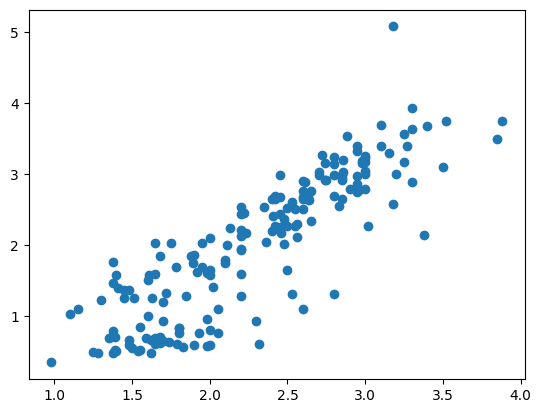

In [115]:
# Can you name two columns which show the relation mentioned in rule 1
# The column names are just numbers
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.


# column number 2.8 and 3.06

X_values = my_df['2.8']
Y_values = my_df['3.06']

plt.scatter(X_values, Y_values)

# Observation
# points in the plot are nearly scattered around a straight line.
# the plot is dense between 2.5 to 3.0 and around 1.5


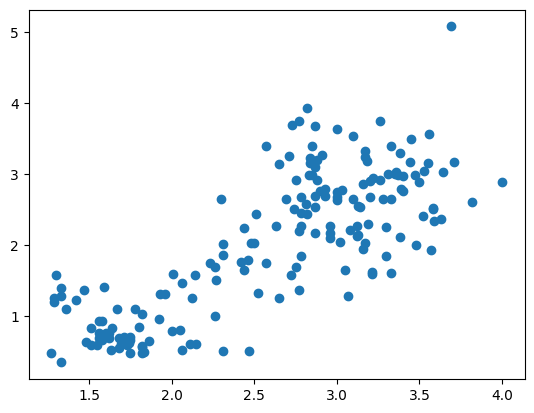

In [117]:
# Can you name two columns which show the relation mentioned in rule 2
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.

# columns 3.06 and 3.92
X_values_ = my_df['3.92']
Y_values_ = my_df['3.06']

plt.scatter(X_values_, Y_values_)

# points are more scattered than previous one if comparing it to a straight line.
# density is more around 3 and 1.5


In [34]:
# Can you name two columns which show the relation mentioned in rule 3
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.





**Assignment END<br>
Please submit on teams before the deadline**